# Práctica 2 — Proceso KDD aplicado al dataset COVID‑19  (Our World in Data)

**Carrera:** Ciencia de Datos 

**Asignatura:** Minería de Datos  

**Nombre del Alumno:** Luis Enrique Villalon Pineda

**Carrera de origen:** Actuaria

---
## Objetivos: 

1. Entender las fases del proceso KDD
2. Explorar cómo varió la tasa de vacunación para un país en particular (diferente a Italia)
3. Explorar cómo varió la tasa de vacunación de covid en América Latina durante los años de la pandemia
4. Identificar a los países con mayor tasa de vacunación (en América Latina)
5. Identificar las características de los países con mayor tasa de vacunación (en América Latina)


## Indicaciones generales

- Ejecuta **celda por celda**, leyendo primero los comentarios
- En las secciones marcadas como **(Experimenta)**, **(Modifica)** o **(Reflexiona)**, realiza lo que se pide y **deja tus conclusiones en texto**. Eres libre de modificar las celdas sin perder de vista el objetivo (puedes cambiar el estilo de visulizaciones o utilizar, por ejemplo seaborn o plotly).
- Deberás documentar todo el proceso, no olvides incluir los metadatos de los atributos que utilices
- Descarga el dataset `owid-covid-data.csv` desde el repositorio [Our World in Data GitHub]
(https://github.com/owid/covid-19-data/tree/master/public/data)

In [3]:
# ====== Librerías ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from pathlib import Path

## Paso 0 — Exploración del banco de datos y Entendimiento del dominio del negocio:

https://docs.owid.io/projects/covid/en/latest/dataset.html#the-data-you-find-here-and-our-data-sources

**Instrucciones:**
1. Carga el banco de datos
2. Explora el banco de datos completo: dimensión, cabecera, etc.
3. Despliega la estadística básica
4. Presenta la(s) visualización que consideres pertinente para comprender el problema y los datos
5. Busca el archivo con los metadatos del banco de datos 
6. Verifica que los metadatos coinciden con el tipo de dato que muestra el archivo
7. Muestra los campos que NO coinciden 

**Recuerda documentar** todas las decisiones que tomaste en el proceso


In [4]:
# === Parámetros (Modifica) ===
data_path = Path(r'.\owid-covid-data.csv')  # coloca el CSV en el mismo directorio

assert data_path.exists(), f'No se encontró el archivo: {data_path.resolve()}'
df = pd.read_csv(data_path, low_memory=False)

#2 Despliega la dimensión del data set completo: usa shape y head
df.shape

(429435, 67)

In [5]:
#2
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [6]:
# 3- Estadisticas basicas 
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [7]:
# !pip install skimpy

In [8]:
# 4 - Visualizacion
from skimpy import skim

skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 429435 │ │ float64     │ 61    │                                                          │
│ │ Number of columns │ 67     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA     ┃ NA %    ┃ mean    ┃ sd       ┃ p0     ┃ p25     ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ total_c │  17631 │ 4.10562 │ 7365000 │ 44780000 │      0 │    6281 │   63650 │   758300 │ 7759000 │   ▇    │  │
│ │ ases    │        │ 7161270 │         │          │        │         │         │          │      00 │        │  │
│ │         │        │     041 │         │          │        │         │         │          │         │        │  │
│ │ new_cas │  19276 │ 4.48868 │    8017 │   229700 │      0 │       0 │       0 │        0 │ 4424000 │   ▇    │  │
│ │ es      │        │ 8625752 │         │          │        │         │         │          │       0 │        │  │
│ │         │        │    4425 │         │          │        │         │         │          │         │        │  │
│ │ new_cas │  20506 │ 4.77511 │    8041 │    86620 │      0 │       0 │      12 │    313.3 │ 6319000 │   ▇    │  │
│ │ es_smoo │        │ 1483693 │         │          │        │         │         │          │         │        │  │
│ │ thed    │        │      69 │         │          │        │         │         │          │         │        │  │
│ │ total_d │  17631 │ 4.10562 │   81260 │   441200 │      0 │      43 │     799 │     9574 │ 7057000 │   ▇    │  │
│ │ eaths   │        │ 7161270 │         │          │        │         │         │          │         │        │  │
│ │         │        │     041 │         │          │        │         │         │          │         │        │  │
│ │ new_dea │  18827 │ 4.38413 │   71.85 │     1368 │      0 │       0 │       0 │        0 │  103700 │   ▇    │  │
│ │ ths     │        │ 2639398 │         │          │        │         │         │          │         │        │  │
│ │         │        │     279 │         │          │        │         │         │          │         │        │  │
│ │ new_dea │  20057 │ 4.67055 │   72.06 │    513.6 │      0 │       0 │       0 │     3.14 │   14820 │   ▇    │  │
│ │ ths_smo │        │ 5497339 │         │          │        │         │         │          │         │        │  │
│ │ othed   │        │     527 │         │          │        │         │         │          │         │        │  │
│ │ total_c │  17631 │ 4.10562 │  112100 │   162200 │      0 │    1916 │   29150 │   156800 │  763600 │  ▇▁▁▁  │  │
│ │ ases_pe │        │ 7161270 │         │          │        │         │         │          │         │        │  │
│ │ r_milli │        │     041 │         │          │        │         │         │          │         │        │  │
│ │ on      │        │         │         │          │   

In [9]:
#!pip install dataprep

In [10]:
# 5- Cargar Metadatos 
data_path = Path(r'.\owid-covid-codebook.csv')  

assert data_path.exists(), f'No se encontró el archivo: {data_path.resolve()}'
df_meta = pd.read_csv(data_path, low_memory=False)
df_meta.head(10)

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country code...
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Dashboard by the WHO,Confirmed cases,Total confirmed cases of COVID-19. Counts can ...
5,new_cases,COVID-19 Dashboard by the WHO,Confirmed cases,New confirmed cases of COVID-19. Counts can in...
6,new_cases_smoothed,COVID-19 Dashboard by the WHO,Confirmed cases,New confirmed cases of COVID-19 (7-day smoothe...
7,total_deaths,COVID-19 Dashboard by the WHO,Confirmed deaths,Total deaths attributed to COVID-19. Counts ca...
8,new_deaths,COVID-19 Dashboard by the WHO,Confirmed deaths,New deaths attributed to COVID-19. Counts can ...
9,new_deaths_smoothed,COVID-19 Dashboard by the WHO,Confirmed deaths,New deaths attributed to COVID-19 (7-day smoot...


In [11]:
# 6 y 7 - Verificar Metadatos(columnas)
missing_in_df = df_meta[~df_meta['column'].isin(df.columns)]
print("Columnas delos metadatos que NO están en nuestros datos:")
display(missing_in_df)

Columnas delos metadatos que NO están en nuestros datos:


,column,source,category,description


## Fase 1 — Identificación de los datos relevantes

**Objetivo:** Definir el alcance del análisis y elegir subconjuntos/variables relevantes.

**Instrucciones:**
1. Selecciona un **país** objetivo para el análisis (`target_country`). Toma en cuenta que no todos los países tienen todas las variables; documenta supuestos y decisiones.

He seleccionado Estados Unidos como caso de estudio para analizar su estrategia de vacunación contra COVID-19. A pesar de ser una potencia mundial con acceso temprano a las vacunas, el país enfrentó desafíos únicos en la implementación de su campaña de inmunización, incluyendo hesitación vacunal, desigualdades en el acceso y politización del tema sanitario.
Objetivos del análisis:
1. Velocidad de implementación: Evaluar el ritmo inicial de vacunación y identificar períodos de aceleración o desaceleración en la campaña mediante el análisis de nuevas vacunaciones diarias.
2. Cobertura poblacional: Examinar qué porcentaje de la población estadounidense recibió al menos una dosis, esquema completo y dosis de refuerzo para medir la efectividad de la estrategia de inmunización.
3. Evolución temporal de la campaña: Analizar cómo progresó la vacunación a lo largo del tiempo, identificando hitos importantes como la autorización de nuevas vacunas y cambios en las políticas de elegibilidad.
4. Estrategia de refuerzos: Estudiar la implementación de dosis adicionales y de refuerzo, y su adopción por parte de la población.
5. Desafíos en la cobertura: Identificar períodos donde la vacunación se estancó y analizar posibles factores que influyeron en la hesitación vacunal

In [12]:
target_country = 'United States'                 

2. Define un **rango de fechas** 


En base a: https://grok.com/share/c2hhcmQtMg%3D%3D_97b68925-08c1-4e0a-853a-6f25e12566d7 tomaremos el año de la pandemia del 20 de Enero del 2020 al 5 de Mayo del 2023

In [13]:
date_start = '2020-01-20'  
date_end   = '2023-05-05'

3. Elige variables de interés (mínimo: **casos** y **vacunación**; opcional: **UCI**, **pruebas**, **población**).

In [14]:
base_columns = [
    'date', 'location', 'total_vaccinations', 'people_vaccinated',
    'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 
    'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed',
    'population', 'new_cases', 'new_cases_smoothed'
]

4. Genera una tabla con los metadatos de las variables de interés

In [15]:
meta_base = df_meta[df_meta['column'].isin(base_columns)]
display(meta_base)

,column,source,category,description
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
5,new_cases,COVID-19 Dashboard by the WHO,Confirmed cases,New confirmed cases of COVID-19. Counts can in...
6,new_cases_smoothed,COVID-19 Dashboard by the WHO,Confirmed cases,New confirmed cases of COVID-19 (7-day smoothe...
34,total_vaccinations,National government reports,Vaccinations,Total number of COVID-19 vaccination doses adm...
35,people_vaccinated,National government reports,Vaccinations,Total number of people who received at least o...
36,people_fully_vaccinated,National government reports,Vaccinations,Total number of people who received all doses ...
37,total_boosters,National government reports,Vaccinations,Total number of COVID-19 vaccination booster d...
39,new_vaccinations_smoothed,National government reports,Vaccinations,New COVID-19 vaccination doses administered (7...
41,people_vaccinated_per_hundred,National government reports,Vaccinations,Total number of people who received at least o...


5. Inserta en un nuevo chunk el código que necesites para completar las tareas

Dimensión tras selección por fechas y columnas: (309652, 13)
Registros de United States: 1202


,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed,population,new_cases,new_cases_smoothed
403466,2020-01-20,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0
403467,2020-01-21,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0
403468,2020-01-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0
403469,2020-01-23,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0
403470,2020-01-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0


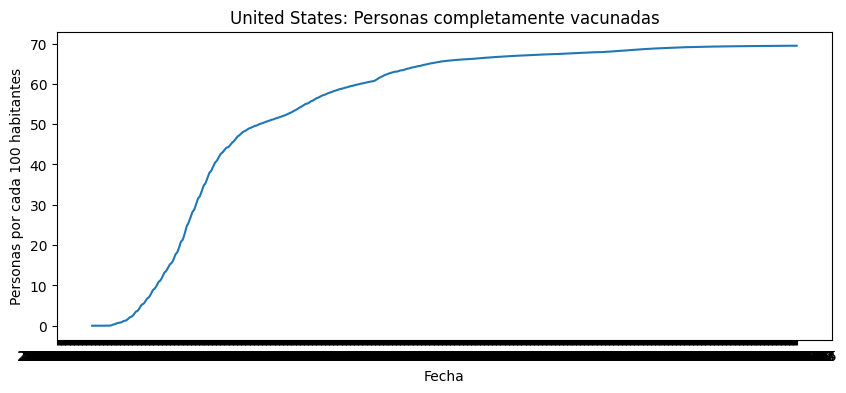

In [16]:
# Filtrado por fechas y columnas
df = df.loc[(df['date'] >= date_start) & (df['date'] <= date_end), base_columns].copy()
print('Dimensión tras selección por fechas y columnas:', df.shape)

# Dataset país objetivo
df_country = df.loc[df['location'] == target_country].copy()
print(f'Registros de {target_country}:', df_country.shape[0])
display(df_country.head())

plt.figure(figsize=(10,4))
plt.plot(df_country['date'], df_country['people_fully_vaccinated_per_hundred'])
plt.title(f'{target_country}: Personas completamente vacunadas')
plt.xlabel('Fecha'); plt.ylabel('Personas por cada 100 habitantes')
plt.show()

## Fase 2 — Limpieza de los datos

**Objetivo:** Detectar y tratar valores faltantes/inconsistencias. 

**Checklist:**
- [ ] ¿Existen columnas con alta proporción de NaN?, ¿Es necesario eliminarlas?


In [17]:
df = df[base_columns]

In [18]:
nan_ratio = df.isna().mean().sort_values(ascending=False)
print("Proporción de NaN por columna:\n", nan_ratio)

Proporción de NaN por columna:
 total_boosters                         0.860024
total_boosters_per_hundred             0.860024
people_fully_vaccinated_per_hundred    0.781284
people_fully_vaccinated                0.781284
people_vaccinated                      0.770077
people_vaccinated_per_hundred          0.770077
total_vaccinations                     0.759433
new_vaccinations_smoothed              0.449308
new_cases                              0.045118
new_cases_smoothed                     0.045118
date                                   0.000000
location                               0.000000
population                             0.000000
dtype: float64


- [ ] ¿Existen variables con ceros estructurales (p. ej., antes del inicio de vacunación)?


In [19]:
zero_counts = (df[base_columns[2:]] == 0).mean().sort_values(ascending=False)
print("\nProporción de ceros por columna:\n", zero_counts)


Proporción de ceros por columna:
 new_cases                              0.843056
new_cases_smoothed                     0.172394
total_boosters_per_hundred             0.012856
new_vaccinations_smoothed              0.010612
people_fully_vaccinated_per_hundred    0.002322
people_vaccinated_per_hundred          0.001185
total_vaccinations                     0.000420
people_vaccinated                      0.000404
people_fully_vaccinated                0.000000
total_boosters                         0.000000
population                             0.000000
dtype: float64


Identificamos ceros en las variables de vacunación antes del inicio de campañas (ej. `total_vaccinations`, `people_vaccinated`). Estos ceros se mantienen, ya que representan una condición real (no faltante).

- [ ] ¿Es razonable hacer una Interpolación/`ffill` para la variable de interés?


Pues principalemente para suavizar series temporales y completar pequeños huecos, aplicamos `ffill` e interpolación lineal dentro de cada país (`location`).  

- [ ] Es necesario realizar algún otro tipo de preprocesamiento? Sí/no/por qué

Si, ya que manejar los valores perdidos y los ceros estructurales, también tuve que rellenar algunas lagunas en los datos usando una combinación de ffill e interpolación. Esto era importante para mantener la coherencia temporal en las series de vacunación de cada país. Tiene sentido hacer esto porque, por naturaleza, las cifras acumuladas de vacunación solo pueden mantenerse igual o aumentar con el tiempo, nunca disminuir.

- [ ] ¿Qué podemos hacer con los casos diarios?

Rellene con `ffill` y, en casos persistentes de NaN, se reemplazó por `0`, ya que representan ausencia de vacunación en días iniciales o falta de reporte puntual.

In [20]:
df_interpolated = df.copy()

num_cols = df.select_dtypes(include='number').columns

# Hacemos forward fill + interpolación dentro de cada país
for col in num_cols:
    df_interpolated[col] = (
        df_interpolated.groupby("location")[col]
        .transform(lambda g: g.ffill().interpolate())
    )

# Casos diarios: rellenamos NaN con ffill y 0
df_interpolated['new_vaccinations_smoothed'] = (
    df_interpolated.groupby("location")['new_vaccinations_smoothed']
    .transform(lambda g: g.ffill().fillna(0))
)
#  La columna new_vaccinations_smoothed puede tener NaN → ffill también
df_interpolated['new_vaccinations_smoothed'] = df_interpolated.groupby("location")['new_vaccinations_smoothed'].ffill().fillna(0)
threshold = 0.5
cols_to_drop = nan_ratio[nan_ratio > threshold].index.tolist()
print("\nColumnas con más de 50% NaN (candidatas a eliminar):", cols_to_drop)


Columnas con más de 50% NaN (candidatas a eliminar): ['total_boosters', 'total_boosters_per_hundred', 'people_fully_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_vaccinated', 'people_vaccinated_per_hundred', 'total_vaccinations']


C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_10872\2173411807.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_country[col] = df_country[col].fillna(method='ffill')


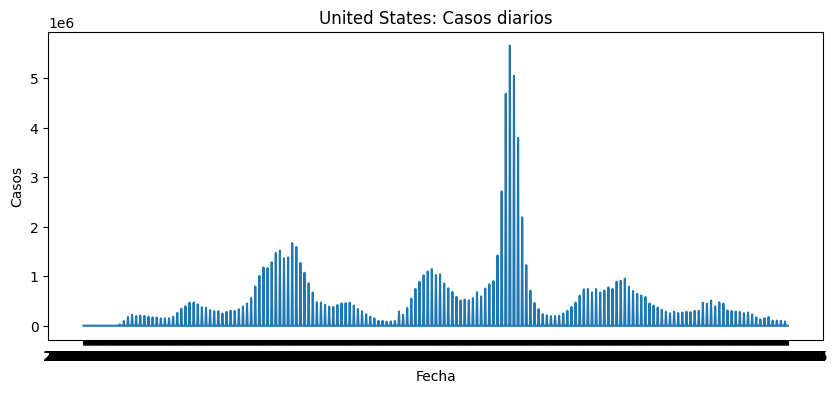

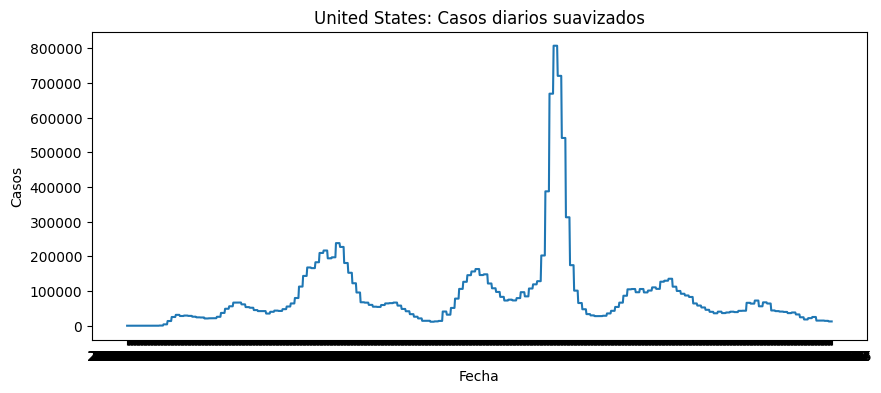

In [21]:
# Exploración de valores faltantes

# Ejemplo: forward-fill para variables acumulativas/lentas- [ ] Es necesario realizar algún otro tipo de preprocesamiento? Sí/no/por qué

for col in ['people_vaccinated','people_fully_vaccinated','icu_patients']:
    if col in df_country.columns:
        df_country[col] = df_country[col].fillna(method='ffill')

# Ejemplo: reemplazo de NaN en casos suavizados con 0 (justifica esta decisión)
if 'new_cases_smoothed' in df_country.columns:
    df_country['new_cases_smoothed'] = df_country['new_cases_smoothed'].fillna(0)
    
# Casos diarios
plt.figure(figsize=(10,4))
plt.plot(df_country['date'], df_country['new_cases'])
plt.title(f'{target_country}: Casos diarios')
plt.xlabel('Fecha'); plt.ylabel('Casos')
plt.show()

# Casos diarios suavizados
plt.figure(figsize=(10,4))
plt.plot(df_country['date'], df_country['new_cases_smoothed'])
plt.title(f'{target_country}: Casos diarios suavizados')
plt.xlabel('Fecha'); plt.ylabel('Casos')
plt.show()

**Diario de decisiones (Preprocesamiento):**
- Describe qué columnas imputaste, con qué técnica y por qué.

Impute las variables numéricas (`total_vaccinations`, `people_vaccinated`, `people_fully_vaccinated`, `total_boosters`, y sus equivalentes `per hundred`).  La técnica aplicada fue **`ffill` (forward fill) + interpolación lineal por país**. La columna `new_vaccinations_smoothed` la rellene con `ffill` y, cuando persistían valores nulos, se completó con `0`, ya que puede representar ausencia de vacunación en días iniciales.  La elección de `ffill` e interpolación responde a la naturaleza acumulativa y continua de la campaña de vacunación (no hay saltos abruptos hacia atrás en los conteos).

- Señala riesgos de introducir sesgos (p. ej., rellenar con 0 vs interpolar).

Use `ffill` puede arrastrar un valor anterior más tiempo del real si el país dejó de reportar datos durante varios días. La interpolación lineal suponemos que tiene un crecimiento "suave" en la vacunación, por lo que no reflejar periodos de picos o pausas. Rellenar `new_vaccinations_smoothed` con `0` en los inicios puede subestimar vacunaciones si hubo retraso en la carga de reportes. En conjunto, las técnicas que aplique quiero tener un equilibrio entre consistencia temporal y minimizar la eliminación de información.



- Indica qué filas/columnas eliminaste (si aplica) y el impacto esperado.

No elimine filas, ya que los ceros iniciales representan un fenómeno real. Al igual no elimine columnas en esta etapa, pero podemos ver que variables como `total_boosters` tienen más proporción de `NaN` en los primeros meses, lo cual puede generar sesgos si se analizan periodos tempranos. Ahora bien el hecho de mantener todas las variables nos permite un análisis más completo; sin embargo, debemos de tener precaución al interpretar series con muchos valores imputados o muchos NaN en fases iniciales.

## Fase 3 — Transformación y reducción
**Objetivo:** Crear variables derivadas, transformar escalas para análisis posterior y reducir la dimensión del banco de datos

**Sugerencias de variables derivadas:**
- `cases_per_million_proxy = new_cases_smoothed / (population/1e6)`

**Checklist:**
- [ ] ¿Es necesario transformar algún tipo de dato? Sí/no/Por qué


Podemos hacer las variables acumulativas: pueden transformarse en incrementos diarios o anuales para análisis de tasas de vacunación.  Variables *per hundred*: ya están normalizadas, pero se pueden usar directamente para comparaciones entre países sin necesidad de escalado adicional.

- [ ] Definir qué variables necesito transformar y por qué

Principalmente `total_vaccinations`, `people_vaccinated`, `people_fully_vaccinated` y el año para sacar la tasa 

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

- [ ] Definir una forma de calcular la tasa de vacunación anual(En Latino America)

1. Filtramos el dataset a países de Latinoamérica.   

In [23]:
latam_countries = [
    "Mexico", "Argentina", "Chile", "Colombia", "Peru", "Brazil", 
    "Ecuador", "Bolivia", "Uruguay", "Paraguay", "Venezuela", 
    "Costa Rica", "Panama", "Guatemala", "Honduras", "El Salvador", 
    "Nicaragua", "Dominican Republic", "Cuba"
]
# Filtrar a Latinoamérica
latam = df[df['location'].isin(latam_countries)].copy()

2. Para cada país y año, calculamos la diferencia entre el valor acumulado de `people_fully_vaccinated` al 31 de diciembre y al 1 de enero.  
3. Dividir esa diferencia entre la población total del país.  
4. Expresar la tasa como porcentaje (%) o personas vacunadas por cada 100 habitantes. 

In [24]:
# Diferencia acumulada por año = vacunados al cierre del año - vacunados al inicio
tasa_anual = (
    latam.groupby(['location', 'year'])['people_fully_vaccinated']
         .agg(lambda x: x.max() - x.min())
         .reset_index(name='anual_vaccinated')
)

if 'population' in df.columns:
    pop = df[['location', 'population']].drop_duplicates()
    tasa_anual = tasa_anual.merge(pop, on='location', how='left')
    tasa_anual['tasa_%'] = tasa_anual['anual_vaccinated'] / tasa_anual['population'] * 100


- [ ] ¿Cuándo puedo utilizar `MinMaxScaler` o `StandardScaler`? Define el caso y justifica el por qué

In [25]:
# Variables derivadas (Modifica/Extiende)
for col in ['people_fully_vaccinated','population','new_cases_smoothed']:
    assert col in df_country.columns, f'Columna faltante: {col}'
    
df_country['cases_per_million_proxy'] = df_country['new_cases_smoothed'] / (df_country['population'] / 1_000_000)

display(df_country.head())

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed,population,new_cases,new_cases_smoothed,cases_per_million_proxy
403466,2020-01-20,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0,0.0
403467,2020-01-21,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0,0.0
403468,2020-01-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0,0.0
403469,2020-01-23,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0,0.0
403470,2020-01-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338289856,0.0,0.0,0.0


## Fase 4 — Minería de datos
**Objetivo:** Aplicar al menos una técnica de minería y **explicar** resultados.

### A) — Series de tiempo (correlaciones y picos)
- Correlación entre `new_cases_smoothed` y `people_fully_vaccinated` 
- Identificación de **picos** en casos (usa un umbral manual sencillo si no tienes librerías extra).

### B) — Clustering entre países (patrones de 2021)
- Construye una matriz país × fecha con una métrica comparable (p. ej., `delta_vaccinated_norm`).
- Aplica **K-Means** (parámetro **k** modificable) y calcula **Silhouette Score**.
- (Opcional) Prueba **DBSCAN** y comenta diferencias.

## A) correlaciones y picos (Experimenta)

Correlaciones (país objetivo):


,new_cases_smoothed,people_fully_vaccinated
new_cases_smoothed,1.000000,-0.092135
people_fully_vaccinated,-0.092135,1.000000


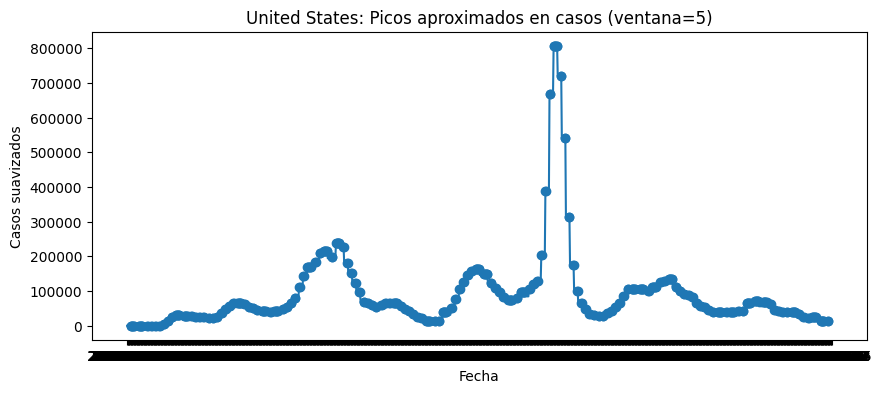

In [26]:
corr = df_country[['new_cases_smoothed','people_fully_vaccinated']].corr()
print('Correlaciones (país objetivo):')
display(corr)

# Detección simple de picos en casos: valores locales mayores que vecinos
window = 5  # (Modifica)
series = df_country['new_cases_smoothed'].values
peaks_idx = []
for i in range(window, len(series)-window):
    if series[i] == max(series[i-window:i+window+1]) and series[i] > 0:
        peaks_idx.append(i)

plt.figure(figsize=(10,4))
plt.plot(df_country['date'], series)
plt.scatter(df_country['date'].iloc[peaks_idx], series[peaks_idx])
plt.title(f'{target_country}: Picos aproximados en casos (ventana={window})')
plt.xlabel('Fecha'); plt.ylabel('Casos suavizados')
plt.show()

## B) Clustering entre países para identificar las características similares entre los que tienen mayor tasa de vacunación (Desarrolla)

- Construye una matriz país × fecha con una métrica comparable (p. ej., `delta_vaccinated_norm`).

In [ ]:
latam["delta_vaccinated_norm"] = (
    latam.groupby("location")["people_vaccinated"].diff().fillna(0)
)

# Pivotear: País × Fecha
matrix = latam.pivot_table(
    index="location", 
    columns="date", 
    values="delta_vaccinated_norm", 
    fill_value=0
)


# Normalizar la matriz
scaler = MinMaxScaler()
matrix_scaled = scaler.fit_transform(matrix)

In [46]:
matrix_scaled_df = pd.DataFrame(matrix_scaled, index=matrix.index, columns=matrix.columns)
matrix_scaled_df.head()

date,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2023-04-26,2023-04-27,2023-04-28,2023-04-29,2023-04-30,2023-05-01,2023-05-02,2023-05-03,2023-05-04,2023-05-05
location,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062086,0.056031,0.067814,0.007386,0.006562,0.005495,0.141079,0.145544,0.575419,0.487528
Bolivia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colombia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- Aplica **K-Means** (parámetro **k** modificable) y calcula **Silhouette Score**.

In [62]:
k = 3  # número de clusters, puedes probar con otros
matrix_norm = latam.pivot_table(
    index="location", 
    columns="date", 
    values="people_vaccinated_per_hundred", 
    fill_value=0
)

features = pd.DataFrame({
    "mean_vaccinated": matrix_norm.mean(axis=1),
    "var_vaccinated": matrix_norm.var(axis=1)
}, index=matrix_norm.index)

# KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(features)

sil_score = silhouette_score(features, labels_kmeans)
print(f"Silhouette Score (k={k}): {sil_score:.3f}")

Silhouette Score (k=3): 0.604


C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_10872\213256216.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(features["mean_vaccinated"][i]+0.2, features["var_vaccinated"][i], country, fontsize=8)


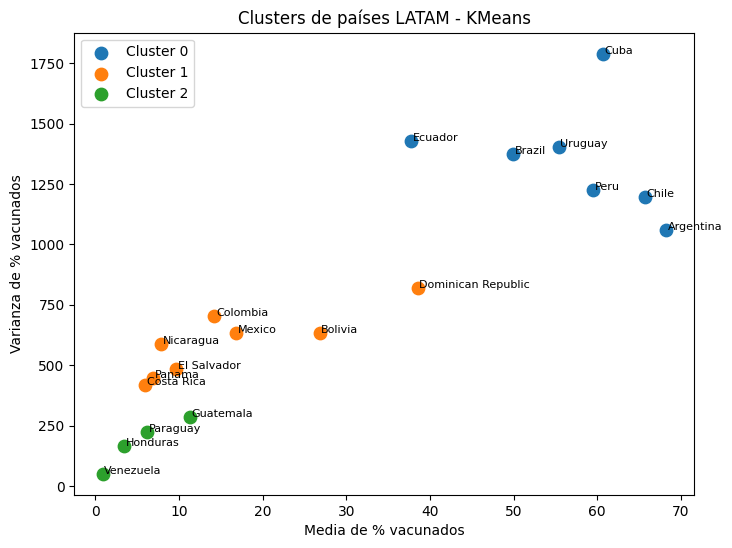

In [ ]:
# Matriz de vacunación normalizada
matrix_norm = latam.pivot_table(
    index="location", 
    columns="date", 
    values="people_vaccinated_per_hundred", 
    fill_value=0
)

features = pd.DataFrame({
    "mean_vaccinated": matrix_norm.mean(axis=1),
    "var_vaccinated": matrix_norm.var(axis=1)
}, index=matrix_norm.index)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(features)

# --- Gráfico KMeans
plt.figure(figsize=(8,6))
for c in np.unique(labels_kmeans):
    idx = labels_kmeans == c
    plt.scatter(features.loc[idx,"mean_vaccinated"], features.loc[idx,"var_vaccinated"], label=f"Cluster {c}", s=80)

for i, country in enumerate(features.index):
    plt.text(features["mean_vaccinated"][i]+0.2, features["var_vaccinated"][i], country, fontsize=8)

plt.title("Clusters de países LATAM - KMeans")
plt.xlabel("Media de % vacunados")
plt.ylabel("Varianza de % vacunados")
plt.legend()
plt.show()


- (Opcional) Prueba **DBSCAN** y comenta diferencias.

In [71]:
# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
labels_dbscan = dbscan.fit_predict(features)

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_10872\1144218117.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(features["mean_vaccinated"][i]+0.2, features["var_vaccinated"][i], country, fontsize=8)


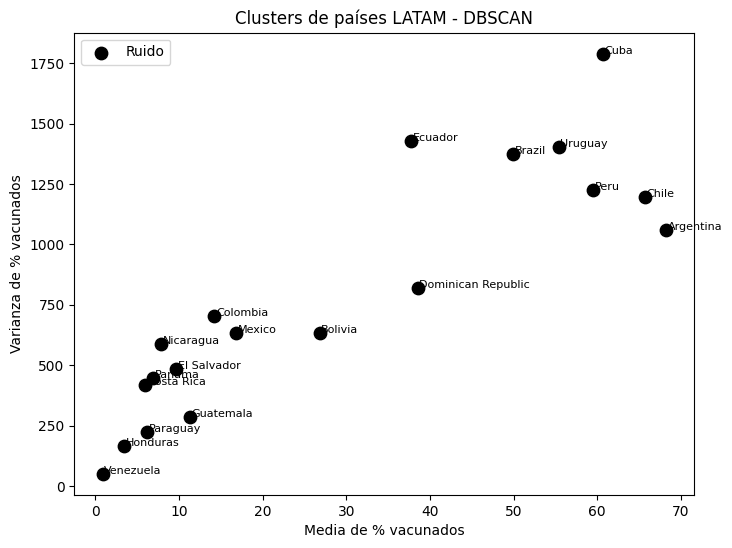

In [72]:
plt.figure(figsize=(8,6))
for c in np.unique(labels_dbscan):
    idx = labels_dbscan == c
    if c == -1:
        plt.scatter(features.loc[idx,"mean_vaccinated"], features.loc[idx,"var_vaccinated"], color="black", label="Ruido", s=80)
    else:
        plt.scatter(features.loc[idx,"mean_vaccinated"], features.loc[idx,"var_vaccinated"], label=f"Cluster {c}", s=80)

for i, country in enumerate(features.index):
    plt.text(features["mean_vaccinated"][i]+0.2, features["var_vaccinated"][i], country, fontsize=8)

plt.title("Clusters de países LATAM - DBSCAN")
plt.xlabel("Media de % vacunados")
plt.ylabel("Varianza de % vacunados")
plt.legend()
plt.show()

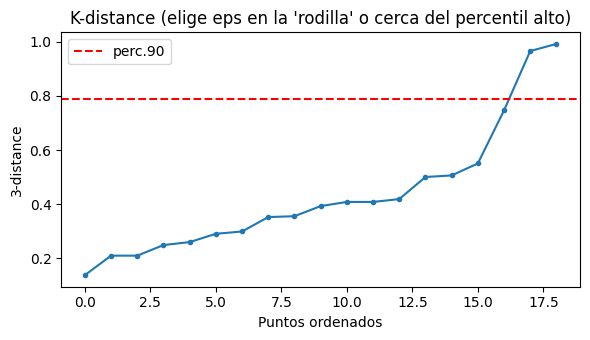

Valor sugerido eps (90th percentile): 0.7906315572379573
Conteo etiquetas DBSCAN (incluye -1 ruido):
cluster_dbscan
 1    12
 0     6
-1     1
Name: count, dtype: int64
Silhouette (DBSCAN, excluyendo ruido): 0.6716596909547483


,eps,n_clusters,n_noise,silhouette
0,0.137989,1,16,NaN
1,0.232931,1,15,NaN
2,0.327873,3,8,0.626903
3,0.422816,2,3,0.763296
4,0.517758,2,3,0.763296
5,0.612700,2,2,0.738771
6,0.707643,2,1,0.671660
7,0.802585,2,1,0.671660
8,0.897528,2,0,0.674176
9,0.992470,2,0,0.674176


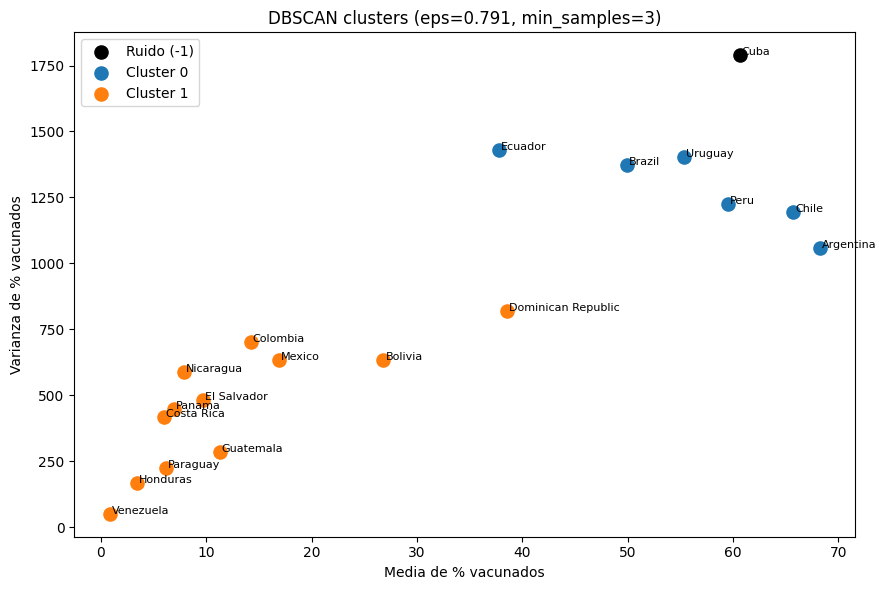

In [75]:
# ---- Requiere: pandas, numpy, matplotlib, sklearn ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# ----- 0) (Re)calcular features si no las tienes -----
# Asumo que tienes matrix_norm (país x fecha con people_vaccinated_per_hundred).
# Si no, reconstruyela desde latam_2021:
# matrix_norm = latam_2021.pivot_table(index='location', columns='date',
#                                      values='people_vaccinated_per_hundred', fill_value=0)

features = pd.DataFrame({
    "mean_vaccinated": matrix_norm.mean(axis=1),
    "var_vaccinated": matrix_norm.var(axis=1)
}, index=matrix_norm.index)

# ----- 1) Escalar -----
scaler = StandardScaler()
X = scaler.fit_transform(features)   # ahora las dos dimensiones están en escala comparable

# ----- 2) K-distance plot para elegir eps -----
min_samples = 3   # valor razonable para dataset pequeño (puedes probar 2 o 4)
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, _ = nbrs.kneighbors(X)
k_distances = np.sort(distances[:, -1])   # distancia al k-ésimo vecino de cada punto

plt.figure(figsize=(6,3.5))
plt.plot(k_distances, marker='.', linestyle='-')
plt.axhline(y=np.percentile(k_distances,90), color='r', linestyle='--', label='perc.90')
plt.ylabel(f"{min_samples}-distance")
plt.xlabel("Puntos ordenados")
plt.title("K-distance (elige eps en la 'rodilla' o cerca del percentil alto)")
plt.legend()
plt.tight_layout()
plt.show()

# Sugerencia automática: usar el percentil 85-95 como candidato inicial
eps_candidate = float(np.percentile(k_distances, 90))
print("Valor sugerido eps (90th percentile):", eps_candidate)

# ----- 3) Ejecutar DBSCAN con ese eps candidato -----
db = DBSCAN(eps=eps_candidate, min_samples=min_samples)
labels_db = db.fit_predict(X)
features['cluster_dbscan'] = labels_db

print("Conteo etiquetas DBSCAN (incluye -1 ruido):")
print(features['cluster_dbscan'].value_counts())

# Silhouette sólo si hay al menos 2 clusters (excluyendo ruido)
valid_mask = labels_db != -1
if valid_mask.sum() > 1 and len(np.unique(labels_db[valid_mask])) > 1:
    sil = silhouette_score(X[valid_mask], labels_db[valid_mask])
else:
    sil = np.nan
print(f"Silhouette (DBSCAN, excluyendo ruido): {sil}")

# ----- 4) Barrido automático de eps (opcional) para ver comportamiento -----
eps_list = np.linspace(max(0, k_distances.min()), k_distances.max(), 10)
rows = []
for e in eps_list:
    db_tmp = DBSCAN(eps=e, min_samples=min_samples).fit(X)
    labs = db_tmp.labels_
    n_clusters = len(set(labs) - {-1})
    n_noise = list(labs).count(-1)
    sil_tmp = (silhouette_score(X[labs!=-1], labs[labs!=-1])
               if n_clusters > 1 else np.nan)
    rows.append((e, n_clusters, n_noise, sil_tmp))

tbl = pd.DataFrame(rows, columns=['eps','n_clusters','n_noise','silhouette'])
display(tbl)

# ----- 5) Ploteo final (media vs varianza) coloreado por DBSCAN -----
plt.figure(figsize=(9,6))
unique_labels = np.unique(labels_db)
for lab in unique_labels:
    mask = labels_db == lab
    if lab == -1:
        plt.scatter(features.loc[mask,'mean_vaccinated'], features.loc[mask,'var_vaccinated'],
                    c='k', marker='o', s=90, label='Ruido (-1)')
    else:
        plt.scatter(features.loc[mask,'mean_vaccinated'], features.loc[mask,'var_vaccinated'],
                    s=90, label=f'Cluster {lab}')

# Anotar países
for i, country in enumerate(features.index):
    plt.text(features['mean_vaccinated'].iat[i]+0.2, features['var_vaccinated'].iat[i],
             country, fontsize=8)

plt.xlabel("Media de % vacunados")
plt.ylabel("Varianza de % vacunados")
plt.title(f"DBSCAN clusters (eps={eps_candidate:.3f}, min_samples={min_samples})")
plt.legend()
plt.tight_layout()
plt.show()


In [73]:
# DataFrame con asignación de cluster
clusters = pd.DataFrame({
    "location": features.index,
    "cluster_kmeans": labels_kmeans,
    "cluster_dbscan": labels_dbscan
})

clusters.head()

,location,cluster_kmeans,cluster_dbscan
0,Argentina,0,-1
1,Bolivia,1,-1
2,Brazil,0,-1
3,Chile,0,-1
4,Colombia,1,-1


## Fase 5 — Evaluación e interpretación
**Objetivo:** Evaluar resultados con métricas y discutir **limitaciones**.

- Para clustering, reporta **Silhouette Score** y comenta si los grupos tienen **sentido**.
- Para series de tiempo, discute el **desfase temporal** entre vacunación y cambios en casos/uci.
- Señala **sesgos**: definición de caso, cambios de prueba, retrasos de reporte, diferencias demográficas.
- Presenta una tabla con la comparación en la tasa de vacunacion anual para todos los años de la pandemia
- Genera una gráfica que muestre cómo fue cambiando, a lo largo de la pandemia, el número de personas totalmente vacunadas 

### Reflexión (responde)
1. **Preprocesamiento:** ¿Qué estrategia de imputación funcionó mejor y por qué?
2. **Transformación:** ¿Qué variables derivadas aportaron mayor valor analítico?
3. **Minería:** ¿Cómo cambia el resultado al variar **k** (K-Means) o el **window** para picos?
4. **Evaluación:** ¿Qué valor arrojó Silhouette Score y cómo lo interpretas en este contexto?
5. **Limitaciones:** Enumera al menos **3** limitaciones del dataset o del enfoque utilizado.

## Reto

Con el banco de datos original, intenta obtener conocimiento extra sobre la relación vacunación/muertes o algún otro tema que consideres relevante (con las herramientas que conoces hasta ahora)